## Урок 1. Алгоритм линейной регрессии. 
## Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

### Линейная регрессия

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]) # стаж
X.shape

(2, 10)

$$\vec{y}=X\vec{w}+\vec{\epsilon},$$


$$\text{где }\vec{y} = \begin{pmatrix}
y_{1}\\ 
\vdots\\ 
y_{n}
\end{pmatrix}, 
X = \begin{pmatrix}
1 & x_{1}\\ 
\vdots & \vdots\\ 
1 & x_{n}
\end{pmatrix},
\vec{w} = \begin{pmatrix}
w_{0}\\ 
w_{1}
\end{pmatrix}
$$

In [3]:
# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

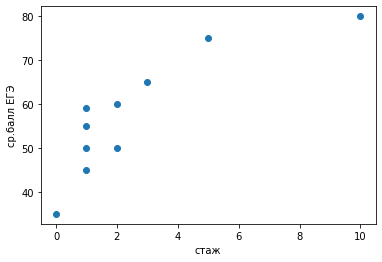

In [4]:
plt.scatter(X[1], y)
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

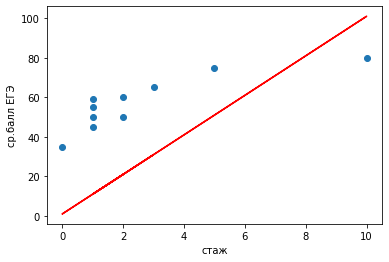

In [5]:
# y = m * x + b
m = 10
b = 1
plt.scatter(X[1], y);
plt.plot(X[1],  m * X[1] + b, color='red')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

In [6]:
y_pred1 = 45 + 4.5 * X[1] 
y_pred2 = 40 + 6 * X[1]

In [7]:
y_pred1

array([49.5, 49.5, 54. , 49.5, 58.5, 45. , 67.5, 90. , 49.5, 54. ])

In [8]:
y_pred2

array([ 46,  46,  52,  46,  58,  40,  70, 100,  46,  52])

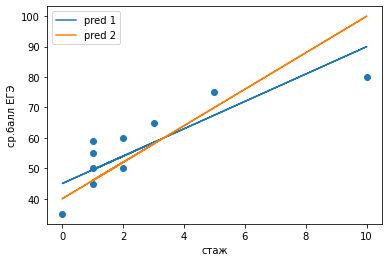

In [9]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='pred 1')
plt.plot(X[1], y_pred2, label='pred 2')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ')
plt.legend();

In [10]:
w = [35, 5]
print(w @ X)
print(np.dot(w, X))
print(np.dot(X.T, w))
print(w[0] * X[0] + w[1] * X[1])
print(np.sum(w * X.T, axis=1))

[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]


In [11]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)
err1, err2

(0.7, 1.8)

In [12]:
# mae - mean absolute error
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(6.4, 7.4)

In [13]:
# mse - mean squared error
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(49.15, 83.4)

### Метод наименьших квадратов

Нормальное уравнение линейной регрессии
$$\vec{w} = (X^{T}X)^{-1}X^{T}\vec{y}$$

In [14]:
w = np.linalg.inv(X @ X.T) @ X @ y
#w = np.dot(np.linalg.inv(np.dot(X, X.T)),X)
w

array([47.23214286,  3.91071429])

In [15]:
w1 = np.sum((y - np.mean(y)) * (X[1] - X[1].mean())) / np.sum((X[1] - X[1].mean()) ** 2)
w0 = np.mean(y) - w1 * X[1].mean()
w0, w1

(47.23214285714286, 3.910714285714285)

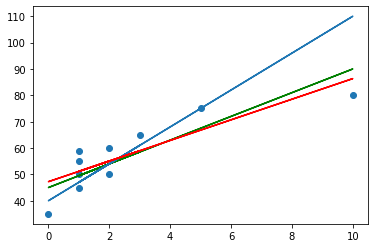

In [16]:
plt.scatter(X[1], y)
plt.plot(X[1], 45 + X[1] * 4.5, color='g')
plt.plot(X[1], 40 + X[1] * 7)
plt.plot(X[1], w[0] + w[1] * X[1], color='red');

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [18]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(6.4, 49.15)

In [19]:
y_pred3 = w[0] + w[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [20]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(6.182142857142859, 45.93750000000002)

### Градиентный спуск

$$L(w)=\frac{1}{n}\sum^{n}_{i=1}\big({y_{pred}}_i-y_{i}\big)^{2}=\frac{1}{n}\sum^{n}_{i=1}\big((w_0\cdot x_{i0}+w_1\cdot x_{i1})-y_{i}\big)^{2}\rightarrow \underset{w}{\text{min}}$$
$$w_j\leftarrow w_j-\alpha\frac{\partial}{\partial w_j}L(w)$$
$$\frac{\partial L(w)}{\partial w_j}=\frac{1}{n} 2\sum^{n}_{i=1}x_{ij}\Big(\sum^{m}_{j=0}(w_jx_{ij})-y_i\Big)$$
$$\vec{w}=\vec{w}-\alpha \frac{2}{n}X^T(X\vec{w}-\vec{y}) $$


In [21]:
n = 10
alpha = 1e-3
w = np.array([1, 0.5])
grad = 1/n * 2 * np.sum(X * (np.sum(w * X.T, axis=1) - y), axis=1)
grad = 1/n * 2 * np.dot(X, (np.dot(w, X) - y))
w, w - alpha * grad

(array([1. , 0.5]), array([1.1102, 0.84  ]))

### Домашние задания

1. Подберите скорость обучения (alpha) и количество итераций:

In [22]:
n = X.shape[1]
alpha = 5e-3
w = np.array([1, 0.5])

for i in range(10000):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    if i % 400 == 0:
        print(i, w, err)

0 [1.551 2.2  ] 3173.15
400 [41.77878595  4.91771835] 62.093311360799156
800 [46.55424157  4.03589394] 46.18715130574685
1200 [47.14787363  3.92627524] 45.94135779290617
1600 [47.22166744  3.91264865] 45.93755961341185
2000 [47.23084067  3.91095474] 45.937500921189624
2400 [47.23198098  3.91074418] 45.93750001423486
2800 [47.23212273  3.910718  ] 45.937500000219956
3200 [47.23214036  3.91071475] 45.93750000000339
3600 [47.23214255  3.91071434] 45.93750000000007
4000 [47.23214282  3.91071429] 45.9375
4400 [47.23214285  3.91071429] 45.937499999999986
4800 [47.23214286  3.91071429] 45.9375
5200 [47.23214286  3.91071429] 45.93749999999999
5600 [47.23214286  3.91071429] 45.93750000000001
6000 [47.23214286  3.91071429] 45.93749999999999
6400 [47.23214286  3.91071429] 45.93749999999998
6800 [47.23214286  3.91071429] 45.93749999999998
7200 [47.23214286  3.91071429] 45.93749999999998
7600 [47.23214286  3.91071429] 45.93749999999998
8000 [47.23214286  3.91071429] 45.93749999999998
8400 [47.23214

Увеличем скорсть обучения, а также уменьшим число итереций для увеличения скорости работы программы

In [40]:
n = X.shape[1]
alpha1 = 2e-2
w = np.array([1, 0.5])

for i in range(1001):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= alpha1 * (1/n * 2 * np.sum(X[j] * (y_pred - y)))

    if i % 100 == 0:
        print(i, w, err)

0 [3.204 7.3  ] 3173.15
100 [41.95214292  4.88570667] 61.568780958579865
200 [46.58653419  4.02993086] 46.171203616546116
300 [47.15320146  3.92529142] 45.94099410777859
400 [47.22249035  3.9124967 ] 45.937552240480294
500 [47.2309626   3.91093223] 45.93750078104854
600 [47.23199854  3.91074093] 45.93750001167747
700 [47.23212521  3.91071754] 45.937500000174595
800 [47.2321407   3.91071468] 45.93750000000263
900 [47.23214259  3.91071433] 45.93750000000004
1000 [47.23214282  3.91071429] 45.937499999999986


##### 2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [56]:
w = np.array([1, 0.5])

for i in range(1000):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    
    w -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, w, err)

0 [3.251 2.751] 3173.15
100 [11.82211538 11.32211538] 737.0918269230771
200 [11.82211538 11.32211538] 737.0918269230771
300 [11.82211538 11.32211538] 737.0918269230771
400 [11.82211538 11.32211538] 737.0918269230771
500 [11.82211538 11.32211538] 737.0918269230771
600 [11.82211538 11.32211538] 737.0918269230771
700 [11.82211538 11.32211538] 737.0918269230771
800 [11.82211538 11.32211538] 737.0918269230771
900 [11.82211538 11.32211538] 737.0918269230771


Должно применяться произведение матриц, а так же транспонируем матрицу ответов(так как матрицы записаны в строковом виде)

In [60]:
w = np.array([1, 0.5])

for i in range(2001):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    
    w -= (alpha * (1/n * 2 * (X @ (y_pred - y).T)))
    if i % 200 == 0:
        print(i, w, err)

0 [1.551 2.2  ] 3173.15
200 [31.7649089   6.76685736] 175.90244862743484
400 [41.77878595  4.91771835] 62.093311360799156
600 [45.30942664  4.26575854] 47.94581257567727
800 [46.55424157  4.03589394] 46.18715130574685
1000 [46.99313195  3.95484948] 45.96853390140358
1200 [47.14787363  3.92627524] 45.94135779290617
1400 [47.20243165  3.91620069] 45.937979558335684
1600 [47.22166744  3.91264865] 45.93755961341185
1800 [47.22844949  3.91139629] 45.93750741048294
2000 [47.23084067  3.91095474] 45.937500921189624


##### 3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога

In [26]:
n = X.shape[1]
alpha1 = 2e-2
w = np.array([1, 0.5])
e = 1e-5

err_pr = 0
for i in range(1001):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= alpha1 * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    if abs(err - err_pr) < e:
      break
    err_pr = err

print(i, w, err)

365 [47.21200224  3.91443341] 45.937727442886604
